In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print(datetime.datetime.now())

2023-06-06 02:28:01.235897


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(-1176.5500)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}

vi = vi_base.baseVI(args_init_dict)

dec: h_dim 48


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(6.5551)tensor(7.3587)tensor(5.1007)tensor(6.2414)tensor(4.8904)tensor(2.8925)tensor(4.4701)tensor(4.1037)tensor(6.5286)tensor(4.6591)tensor(4.3405)tensor(3.8424)tensor(9.6669)tensor(4.5292)tensor(5.5882)tensor(4.0295)tensor(6.3990)tensor(2.9444)tensor(6.1813)tensor(3.4591)tensor(3.4435)tensor(4.5114)tensor(8.3005)tensor(5.4922)tensor(5.1433)tensor(5.4709)tensor(6.5018)tensor(8.9497)tensor(3.9941)tensor(4.3565)tensor(5.9241)tensor(4.7804)tensor(3.6365)tensor(4.7080)tensor(8.0531)tensor(3.7576)tensor(6.6630)tensor(2.4981)tensor(4.5347)tensor(4.8187)tensor(3.8487)tensor(2.8303)tensor(3.2356)tensor(3.9831)tensor(3.3124)tensor(3.8845)tensor(6.3221)tensor(3.5978)tensor(5.7582)tensor(3.4766)tensor(4.8072)tensor(4.7992)tensor(2.6046)tensor(4.5801)tensor(6.9730)tensor(3.2442)tensor(4.5405)tensor(2.8318)tensor(8.8840)tensor(5.4158)tensor(7.0567)tensor(4.4412)tensor(3.1098)tensor(7.6374)tensor(4.0861)tensor(9.2423)tensor(6.2062)tensor(6.0323)tensor(3.6861)tensor(6.2504)tensor(6.2407)tensor

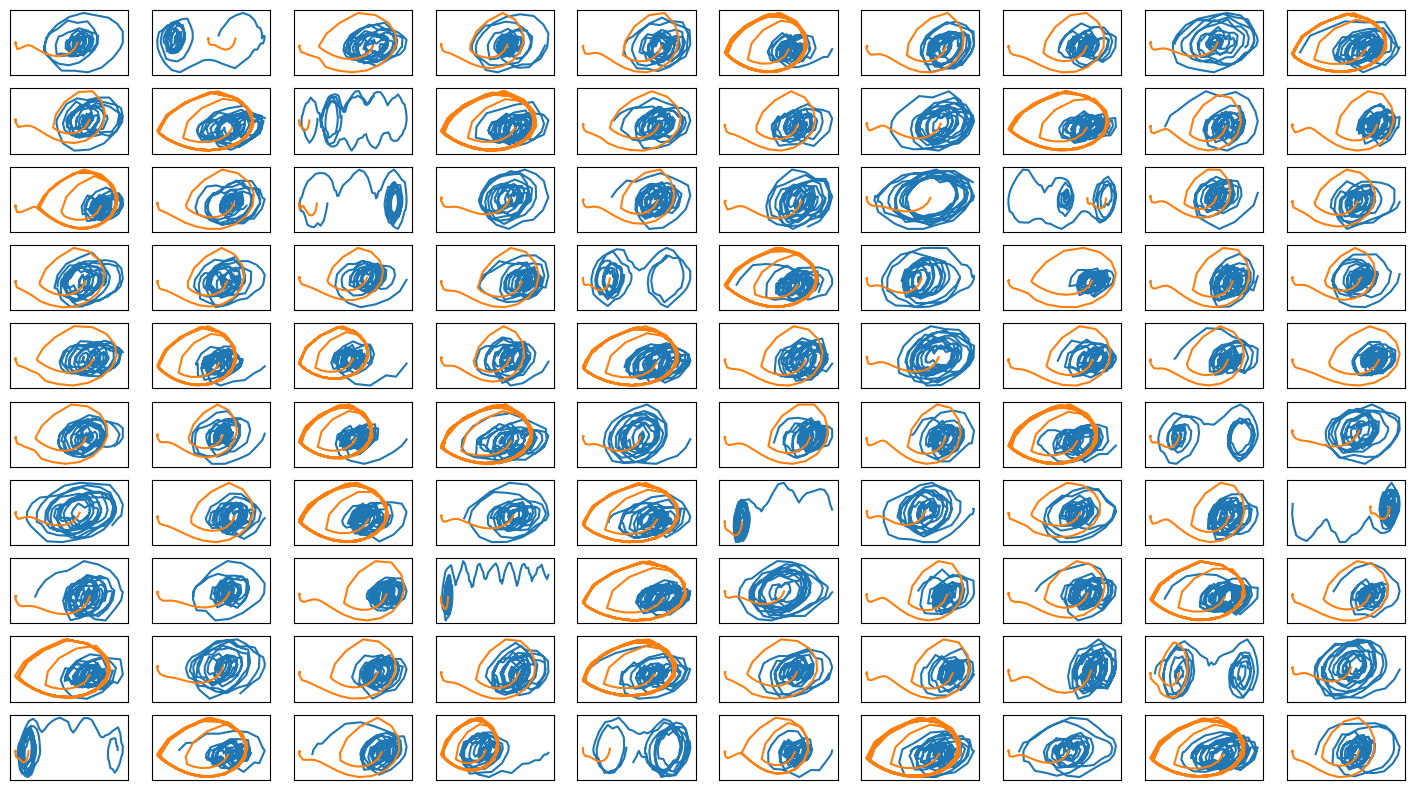

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()



train_vae: enc_dec
train: iter 0  trainloss 479.45333  validloss 576.35045±0.00000  bestvalidloss 576.35045  last_update 0
train: iter 1  trainloss 327.71709  validloss 384.03890±0.00000  bestvalidloss 384.03890  last_update 0
train: iter 2  trainloss 179.94388  validloss 211.84251±0.00000  bestvalidloss 211.84251  last_update 0
train: iter 3  trainloss 852.53214  validloss 423.77116±0.00000  bestvalidloss 211.84251  last_update 1
train: iter 4  trainloss 82.20995  validloss 112.98683±0.00000  bestvalidloss 112.98683  last_update 0
train: iter 5  trainloss 100.43233  validloss 23.44891±0.00000  bestvalidloss 23.44891  last_update 0
train: iter 6  trainloss 24.38554  validloss 57.97621±0.00000  bestvalidloss 23.44891  last_update 1
train: iter 7  trainloss -12.10404  validloss -13.03513±0.00000  bestvalidloss -13.03513  last_update 0
train: iter 8  trainloss -37.47116  validloss -38.74086±0.00000  bestvalidloss -38.74086  last_update 0
train: iter 9  trainloss -59.68032  validloss -66.5

train: iter 77  trainloss -565.82013  validloss -597.67677±0.00000  bestvalidloss -627.29768  last_update 5
train: iter 78  trainloss -562.69616  validloss -584.39057±0.00000  bestvalidloss -627.29768  last_update 6
train: iter 79  trainloss -569.99544  validloss -623.29874±0.00000  bestvalidloss -627.29768  last_update 7
train: iter 80  trainloss -565.27296  validloss -632.65230±0.00000  bestvalidloss -632.65230  last_update 0
train: iter 81  trainloss -570.58358  validloss -615.54459±0.00000  bestvalidloss -632.65230  last_update 1
train: iter 82  trainloss -579.59731  validloss -628.31556±0.00000  bestvalidloss -632.65230  last_update 2
train: iter 83  trainloss -577.10660  validloss -585.65373±0.00000  bestvalidloss -632.65230  last_update 3
train: iter 84  trainloss -585.81043  validloss -648.65299±0.00000  bestvalidloss -648.65299  last_update 0
train: iter 85  trainloss -601.25023  validloss -643.00118±0.00000  bestvalidloss -648.65299  last_update 1
train: iter 86  trainloss -6

train: iter 153  trainloss -659.29288  validloss -744.46232±0.00000  bestvalidloss -744.46232  last_update 0
train: iter 154  trainloss -657.84704  validloss -688.41419±0.00000  bestvalidloss -744.46232  last_update 1
train: iter 155  trainloss -674.70436  validloss -735.04640±0.00000  bestvalidloss -744.46232  last_update 2
train: iter 156  trainloss -657.22489  validloss -739.17581±0.00000  bestvalidloss -744.46232  last_update 3
train: iter 157  trainloss -687.17835  validloss -737.13273±0.00000  bestvalidloss -744.46232  last_update 4
train: iter 158  trainloss -694.41867  validloss -734.68957±0.00000  bestvalidloss -744.46232  last_update 5
train: iter 159  trainloss -681.39918  validloss -731.60051±0.00000  bestvalidloss -744.46232  last_update 6
train: iter 160  trainloss -686.13198  validloss -727.43799±0.00000  bestvalidloss -744.46232  last_update 7
train: iter 161  trainloss -685.73895  validloss -730.63005±0.00000  bestvalidloss -744.46232  last_update 8
train: iter 162  tr

train: iter 229  trainloss -659.28806  validloss -769.64496±0.00000  bestvalidloss -777.76533  last_update 15
train: iter 230  trainloss -695.48766  validloss -705.75227±0.00000  bestvalidloss -777.76533  last_update 16
train: iter 231  trainloss -682.67415  validloss -759.18201±0.00000  bestvalidloss -777.76533  last_update 17
train: iter 232  trainloss -707.26970  validloss -741.55848±0.00000  bestvalidloss -777.76533  last_update 18
train: iter 233  trainloss -692.05949  validloss -727.47669±0.00000  bestvalidloss -777.76533  last_update 19
train: iter 234  trainloss -692.21816  validloss -716.15975±0.00000  bestvalidloss -777.76533  last_update 20
train: iter 235  trainloss -695.37400  validloss -717.96358±0.00000  bestvalidloss -777.76533  last_update 21
train: iter 236  trainloss -714.48997  validloss -746.01529±0.00000  bestvalidloss -777.76533  last_update 22
train: iter 237  trainloss -709.76735  validloss -734.48010±0.00000  bestvalidloss -777.76533  last_update 23
train: ite

train: iter 304  trainloss -749.04074  validloss -757.83452±0.00000  bestvalidloss -785.08382  last_update 40
train: iter 305  trainloss -727.39752  validloss -745.38023±0.00000  bestvalidloss -785.08382  last_update 41
train: iter 306  trainloss -744.88105  validloss -766.30233±0.00000  bestvalidloss -785.08382  last_update 42
train: iter 307  trainloss -734.42305  validloss -758.41124±0.00000  bestvalidloss -785.08382  last_update 43
train: iter 308  trainloss -739.46498  validloss -775.45212±0.00000  bestvalidloss -785.08382  last_update 44
train: iter 309  trainloss -729.87800  validloss -772.56524±0.00000  bestvalidloss -785.08382  last_update 45
train: iter 310  trainloss -737.44763  validloss -754.11814±0.00000  bestvalidloss -785.08382  last_update 46
train: iter 311  trainloss -725.02977  validloss -744.19572±0.00000  bestvalidloss -785.08382  last_update 47
train: iter 312  trainloss -735.16210  validloss -736.25807±0.00000  bestvalidloss -785.08382  last_update 48
train: ite

train: iter 379  trainloss -757.95116  validloss -770.79218±0.00000  bestvalidloss -790.70926  last_update 23
train: iter 380  trainloss -753.86009  validloss -777.98902±0.00000  bestvalidloss -790.70926  last_update 24
train: iter 381  trainloss -737.47318  validloss -798.77665±0.00000  bestvalidloss -798.77665  last_update 0
train: iter 382  trainloss -751.69604  validloss -779.17671±0.00000  bestvalidloss -798.77665  last_update 1
train: iter 383  trainloss -749.16577  validloss -789.78560±0.00000  bestvalidloss -798.77665  last_update 2
train: iter 384  trainloss -752.66029  validloss -732.39480±0.00000  bestvalidloss -798.77665  last_update 3
train: iter 385  trainloss -742.74382  validloss -777.21016±0.00000  bestvalidloss -798.77665  last_update 4
train: iter 386  trainloss -716.79778  validloss -772.70238±0.00000  bestvalidloss -798.77665  last_update 5
train: iter 387  trainloss -733.31044  validloss -651.55921±0.00000  bestvalidloss -798.77665  last_update 6
train: iter 388  

train: iter 454  trainloss -769.87947  validloss -765.76898±0.00000  bestvalidloss -812.81520  last_update 25
train: iter 455  trainloss -762.19280  validloss -767.06758±0.00000  bestvalidloss -812.81520  last_update 26
train: iter 456  trainloss -769.45677  validloss -781.98471±0.00000  bestvalidloss -812.81520  last_update 27
train: iter 457  trainloss -766.59500  validloss -796.86239±0.00000  bestvalidloss -812.81520  last_update 28
train: iter 458  trainloss -768.70224  validloss -776.00623±0.00000  bestvalidloss -812.81520  last_update 29
train: iter 459  trainloss -762.95318  validloss -804.06697±0.00000  bestvalidloss -812.81520  last_update 30
train: iter 460  trainloss -763.65410  validloss -796.84293±0.00000  bestvalidloss -812.81520  last_update 31
train: iter 461  trainloss -761.00594  validloss -783.93213±0.00000  bestvalidloss -812.81520  last_update 32
train: iter 462  trainloss -765.20715  validloss -783.27572±0.00000  bestvalidloss -812.81520  last_update 33
train: ite

train: iter 529  trainloss -775.58601  validloss -784.41092±0.00000  bestvalidloss -833.70683  last_update 6
train: iter 530  trainloss -794.73261  validloss -790.71328±0.00000  bestvalidloss -833.70683  last_update 7
train: iter 531  trainloss -745.92997  validloss -819.10219±0.00000  bestvalidloss -833.70683  last_update 8
train: iter 532  trainloss -806.08337  validloss -794.01274±0.00000  bestvalidloss -833.70683  last_update 9
train: iter 533  trainloss -778.01368  validloss -835.57235±0.00000  bestvalidloss -835.57235  last_update 0
train: iter 534  trainloss -792.34984  validloss -816.75480±0.00000  bestvalidloss -835.57235  last_update 1
train: iter 535  trainloss -774.12177  validloss -837.93391±0.00000  bestvalidloss -837.93391  last_update 0
train: iter 536  trainloss -774.90406  validloss -767.78972±0.00000  bestvalidloss -837.93391  last_update 1
train: iter 537  trainloss -800.54932  validloss -832.06147±0.00000  bestvalidloss -837.93391  last_update 2
train: iter 538  tr

train: iter 604  trainloss -855.05170  validloss -840.00695±0.00000  bestvalidloss -864.41638  last_update 16
train: iter 605  trainloss -824.80503  validloss -850.41062±0.00000  bestvalidloss -864.41638  last_update 17
train: iter 606  trainloss -831.32799  validloss -858.09851±0.00000  bestvalidloss -864.41638  last_update 18
train: iter 607  trainloss -812.20472  validloss -660.62444±0.00000  bestvalidloss -864.41638  last_update 19
train: iter 608  trainloss -831.53735  validloss -807.23212±0.00000  bestvalidloss -864.41638  last_update 20
train: iter 609  trainloss -857.65164  validloss -858.40958±0.00000  bestvalidloss -864.41638  last_update 21
train: iter 610  trainloss -821.22316  validloss -853.88792±0.00000  bestvalidloss -864.41638  last_update 22
train: iter 611  trainloss -851.70582  validloss -851.62259±0.00000  bestvalidloss -864.41638  last_update 23
train: iter 612  trainloss -813.11646  validloss -868.89705±0.00000  bestvalidloss -868.89705  last_update 0
train: iter

train: iter 679  trainloss -863.09781  validloss -814.38568±0.00000  bestvalidloss -891.90268  last_update 8
train: iter 680  trainloss -850.39583  validloss -885.73828±0.00000  bestvalidloss -891.90268  last_update 9
train: iter 681  trainloss -883.31139  validloss -838.86160±0.00000  bestvalidloss -891.90268  last_update 10
train: iter 682  trainloss -824.47162  validloss -855.70129±0.00000  bestvalidloss -891.90268  last_update 11
train: iter 683  trainloss -858.32922  validloss -783.67694±0.00000  bestvalidloss -891.90268  last_update 12
train: iter 684  trainloss -867.17072  validloss -885.13504±0.00000  bestvalidloss -891.90268  last_update 13
train: iter 685  trainloss -857.25100  validloss -877.14580±0.00000  bestvalidloss -891.90268  last_update 14
train: iter 686  trainloss -879.42093  validloss -882.84335±0.00000  bestvalidloss -891.90268  last_update 15
train: iter 687  trainloss -862.21822  validloss -887.60564±0.00000  bestvalidloss -891.90268  last_update 16
train: iter 

train: iter 754  trainloss -856.56895  validloss -884.60127±0.00000  bestvalidloss -904.54946  last_update 63
train: iter 755  trainloss -870.17480  validloss -851.90142±0.00000  bestvalidloss -904.54946  last_update 64
train: iter 756  trainloss -888.85917  validloss -892.56257±0.00000  bestvalidloss -904.54946  last_update 65
train: iter 757  trainloss -898.41828  validloss -894.96586±0.00000  bestvalidloss -904.54946  last_update 66
train: iter 758  trainloss -883.25300  validloss -898.34794±0.00000  bestvalidloss -904.54946  last_update 67
train: iter 759  trainloss -865.04226  validloss -819.59990±0.00000  bestvalidloss -904.54946  last_update 68
train: iter 760  trainloss -882.00168  validloss -879.85656±0.00000  bestvalidloss -904.54946  last_update 69
train: iter 761  trainloss -886.93707  validloss -874.79529±0.00000  bestvalidloss -904.54946  last_update 70
train: iter 762  trainloss -878.34936  validloss -888.46082±0.00000  bestvalidloss -904.54946  last_update 71
train: ite

train: iter 829  trainloss -880.77772  validloss -855.74275±0.00000  bestvalidloss -925.72647  last_update 5
train: iter 830  trainloss -837.37739  validloss -823.75001±0.00000  bestvalidloss -925.72647  last_update 6
train: iter 831  trainloss -874.18010  validloss -897.30338±0.00000  bestvalidloss -925.72647  last_update 7
train: iter 832  trainloss -902.73382  validloss -904.24489±0.00000  bestvalidloss -925.72647  last_update 8
train: iter 833  trainloss -892.80792  validloss -901.32310±0.00000  bestvalidloss -925.72647  last_update 9
train: iter 834  trainloss -870.13177  validloss -815.01177±0.00000  bestvalidloss -925.72647  last_update 10
train: iter 835  trainloss -895.82483  validloss -877.82956±0.00000  bestvalidloss -925.72647  last_update 11
train: iter 836  trainloss -882.09776  validloss -852.59402±0.00000  bestvalidloss -925.72647  last_update 12
train: iter 837  trainloss -905.29014  validloss -882.53194±0.00000  bestvalidloss -925.72647  last_update 13
train: iter 838

train: iter 904  trainloss -914.50166  validloss -921.09203±0.00000  bestvalidloss -932.24135  last_update 3
train: iter 905  trainloss -915.44000  validloss -929.27709±0.00000  bestvalidloss -932.24135  last_update 4
train: iter 906  trainloss -898.40797  validloss -703.92356±0.00000  bestvalidloss -932.24135  last_update 5
train: iter 907  trainloss -913.81143  validloss -868.23576±0.00000  bestvalidloss -932.24135  last_update 6
train: iter 908  trainloss -902.19811  validloss -880.88626±0.00000  bestvalidloss -932.24135  last_update 7
train: iter 909  trainloss -898.38400  validloss -911.97297±0.00000  bestvalidloss -932.24135  last_update 8
train: iter 910  trainloss -905.57897  validloss -903.98900±0.00000  bestvalidloss -932.24135  last_update 9
train: iter 911  trainloss -913.06675  validloss -905.68764±0.00000  bestvalidloss -932.24135  last_update 10
train: iter 912  trainloss -892.93553  validloss -901.60793±0.00000  bestvalidloss -932.24135  last_update 11
train: iter 913  

train: iter 979  trainloss -928.86186  validloss -921.21309±0.00000  bestvalidloss -940.84460  last_update 17
train: iter 980  trainloss -914.21264  validloss -811.73608±0.00000  bestvalidloss -940.84460  last_update 18
train: iter 981  trainloss -871.51233  validloss -944.19000±0.00000  bestvalidloss -944.19000  last_update 0
train: iter 982  trainloss -905.39560  validloss -887.15242±0.00000  bestvalidloss -944.19000  last_update 1
train: iter 983  trainloss -906.56921  validloss -814.39703±0.00000  bestvalidloss -944.19000  last_update 2
train: iter 984  trainloss -882.10805  validloss -650.20706±0.00000  bestvalidloss -944.19000  last_update 3
train: iter 985  trainloss -906.30817  validloss -895.40792±0.00000  bestvalidloss -944.19000  last_update 4
train: iter 986  trainloss -908.66423  validloss -840.42107±0.00000  bestvalidloss -944.19000  last_update 5
train: iter 987  trainloss -925.11575  validloss -901.45541±0.00000  bestvalidloss -944.19000  last_update 6
train: iter 988  

train: iter 1055  trainloss -912.52572  validloss -948.05043±0.00000  bestvalidloss -949.60686  last_update 59
train: iter 1056  trainloss -917.87684  validloss -919.74541±0.00000  bestvalidloss -949.60686  last_update 60
train: iter 1057  trainloss -881.24421  validloss -919.32903±0.00000  bestvalidloss -949.60686  last_update 61
train: iter 1058  trainloss -933.76431  validloss -934.23821±0.00000  bestvalidloss -949.60686  last_update 62
train: iter 1059  trainloss -930.95884  validloss -898.29154±0.00000  bestvalidloss -949.60686  last_update 63
train: iter 1060  trainloss -929.26227  validloss -900.30456±0.00000  bestvalidloss -949.60686  last_update 64
train: iter 1061  trainloss -918.26787  validloss -735.56235±0.00000  bestvalidloss -949.60686  last_update 65
train: iter 1062  trainloss -896.30194  validloss -874.67300±0.00000  bestvalidloss -949.60686  last_update 66
train: iter 1063  trainloss -900.21649  validloss -806.58359±0.00000  bestvalidloss -949.60686  last_update 67
t

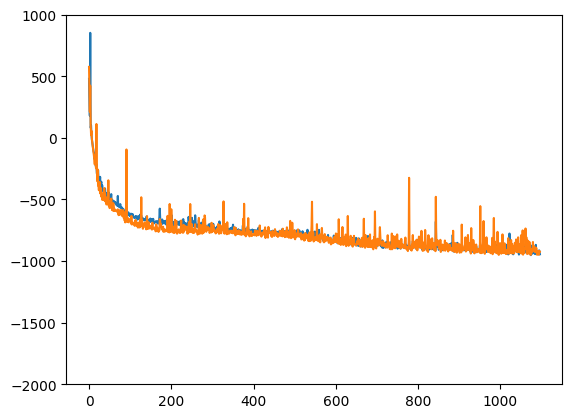

In [10]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56

実環境方策rollout vs Sim環境方策rollout


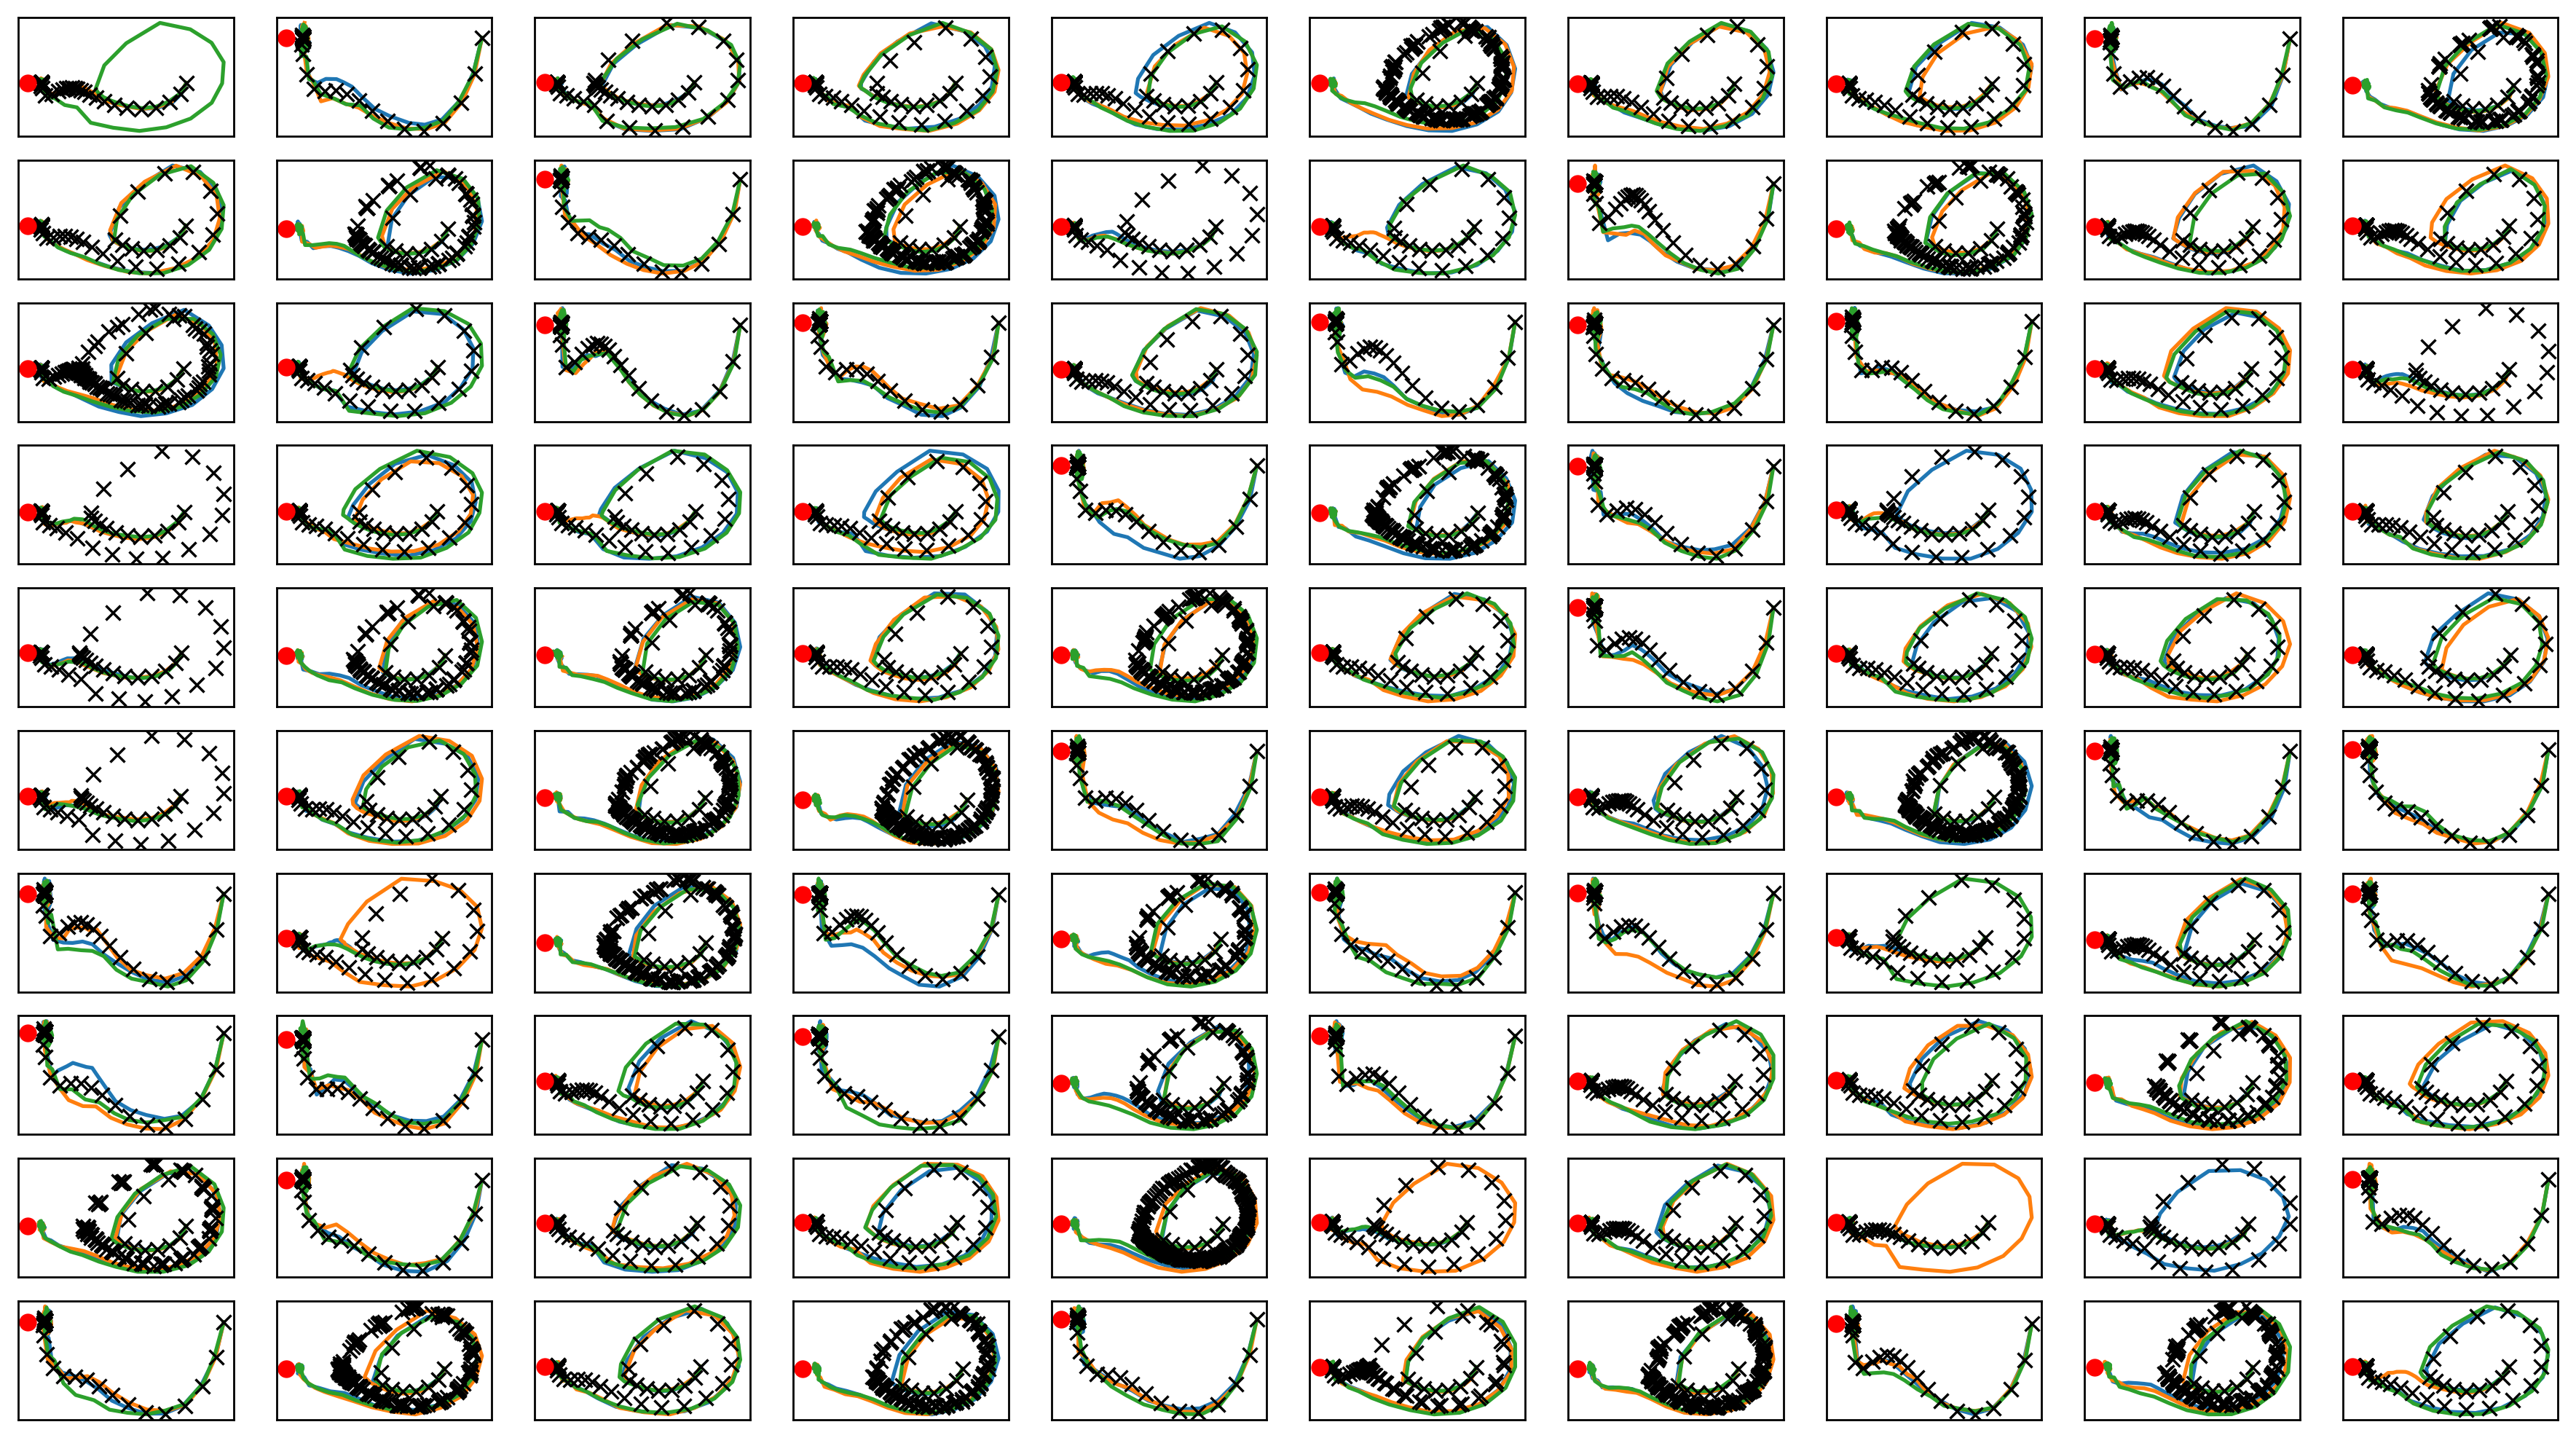

In [13]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")     

plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

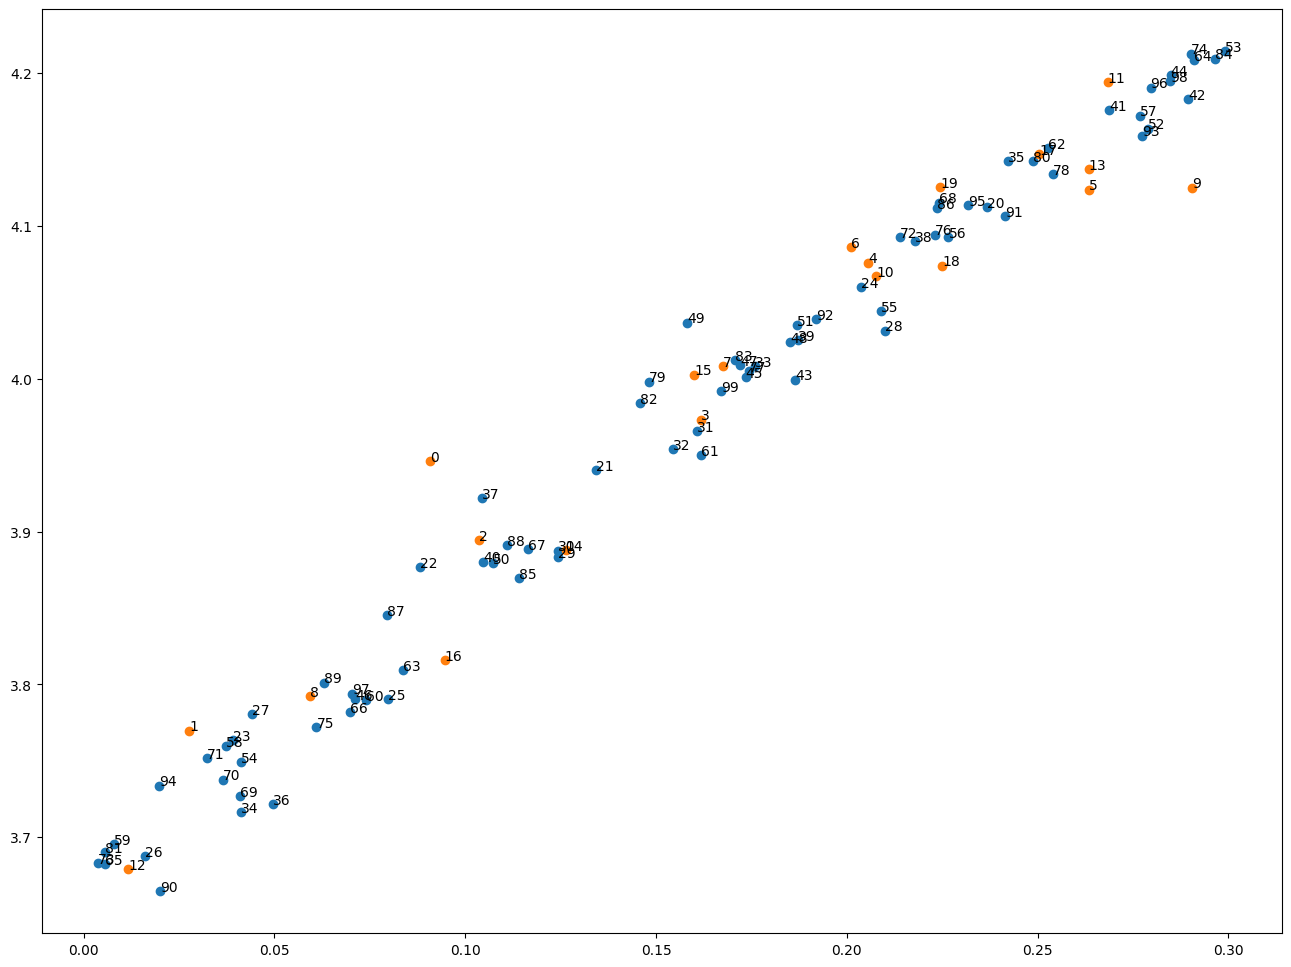

[0.09069977 0.02770158 0.10366822 0.16164502 0.20556585 0.26343523
 0.20114025 0.16760695 0.05943045 0.29047847 0.20769678 0.268382
 0.01171643 0.26344275 0.12633229 0.15994959 0.09465469 0.2503877
 0.22504329 0.2244497  0.2367838  0.13436806 0.08808424 0.03900857
 0.20365066 0.079664   0.01600876 0.04401857 0.20992751 0.1242168
 0.12425378 0.16076892 0.15446673 0.17596651 0.04124241 0.24221739
 0.04960626 0.10432976 0.2177994  0.18710166 0.1046695  0.26876587
 0.28945201 0.18650872 0.28484678 0.17351688 0.07110809 0.17210385
 0.18514347 0.15811743 0.10718093 0.18700803 0.27883117 0.29919686
 0.04114072 0.20904545 0.22663892 0.27690736 0.03728129 0.0078633
 0.07386332 0.16164932 0.25260927 0.0837551  0.29087872 0.00559419
 0.06989228 0.11635819 0.22413649 0.04093657 0.03640304 0.03224824
 0.21389669 0.00376679 0.2901829  0.06098797 0.22314776 0.17440768
 0.25404864 0.14813091 0.24869427 0.00557286 0.14590353 0.17065543
 0.29658485 0.11404235 0.22360033 0.07947587 0.11102526 0.0630522
 

In [14]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


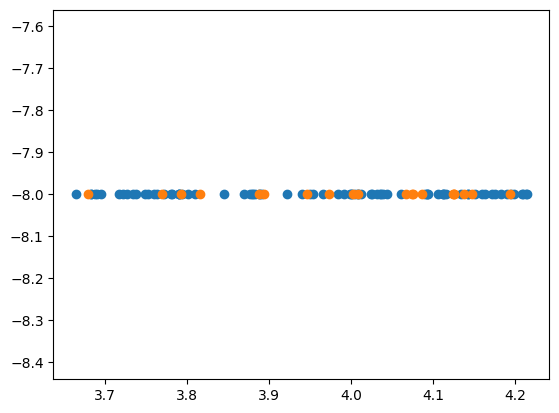

In [15]:

plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [16]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 8.34786  validloss 8.92644±0.00000  bestvalidloss 8.92644  last_update 0
train: iter 1  trainloss 7.56653  validloss 8.04875±0.00000  bestvalidloss 8.04875  last_update 0
train: iter 2  trainloss 6.91184  validloss 7.32597±0.00000  bestvalidloss 7.32597  last_update 0
train: iter 3  trainloss 6.36596  validloss 6.74891±0.00000  bestvalidloss 6.74891  last_update 0
train: iter 4  trainloss 5.89227  validloss 6.24404±0.00000  bestvalidloss 6.24404  last_update 0
train: iter 5  trainloss 5.47435  validloss 5.73641±0.00000  bestvalidloss 5.73641  last_update 0
train: iter 6  trainloss 5.11787  validloss 5.37388±0.00000  bestvalidloss 5.37388  last_update 0
train: iter 7  trainloss 4.80411  validloss 5.04962±0.00000  bestvalidloss 5.04962  last_update 0
train: iter 8  trainloss 4.53537  validloss 4.73734±0.00000  bestvalidloss 4.73734  last_update 0
train: iter 9  trainloss 4.28970  validloss 4.46603±0.00000  bestvalidloss 4.46603  last_update 0
train: iter 10  trai

train: iter 85  trainloss 0.49166  validloss 0.50051±0.00000  bestvalidloss 0.50051  last_update 0
train: iter 86  trainloss 0.45444  validloss 0.46576±0.00000  bestvalidloss 0.46576  last_update 0
train: iter 87  trainloss 0.41881  validloss 0.42789±0.00000  bestvalidloss 0.42789  last_update 0
train: iter 88  trainloss 0.38211  validloss 0.39137±0.00000  bestvalidloss 0.39137  last_update 0
train: iter 89  trainloss 0.34883  validloss 0.35277±0.00000  bestvalidloss 0.35277  last_update 0
train: iter 90  trainloss 0.31065  validloss 0.31589±0.00000  bestvalidloss 0.31589  last_update 0
train: iter 91  trainloss 0.27815  validloss 0.28396±0.00000  bestvalidloss 0.28396  last_update 0
train: iter 92  trainloss 0.24450  validloss 0.24495±0.00000  bestvalidloss 0.24495  last_update 0
train: iter 93  trainloss 0.21353  validloss 0.20816±0.00000  bestvalidloss 0.20816  last_update 0
train: iter 94  trainloss 0.17977  validloss 0.17640±0.00000  bestvalidloss 0.17640  last_update 0
train: ite

train: iter 173  trainloss -0.36081  validloss -0.47822±0.00000  bestvalidloss -0.50396  last_update 17
train: iter 174  trainloss -0.35841  validloss -0.49365±0.00000  bestvalidloss -0.50396  last_update 18
train: iter 175  trainloss -0.39817  validloss -0.45817±0.00000  bestvalidloss -0.50396  last_update 19
train: iter 176  trainloss -0.36446  validloss -0.47555±0.00000  bestvalidloss -0.50396  last_update 20
train: iter 177  trainloss -0.36148  validloss -0.43475±0.00000  bestvalidloss -0.50396  last_update 21
train: iter 178  trainloss -0.37327  validloss -0.47420±0.00000  bestvalidloss -0.50396  last_update 22
train: iter 179  trainloss -0.35125  validloss -0.49301±0.00000  bestvalidloss -0.50396  last_update 23
train: iter 180  trainloss -0.36601  validloss -0.50250±0.00000  bestvalidloss -0.50396  last_update 24
train: iter 181  trainloss -0.36255  validloss -0.48914±0.00000  bestvalidloss -0.50396  last_update 25
train: iter 182  trainloss -0.34530  validloss -0.43289±0.00000 

train: iter 254  trainloss -0.36164  validloss -0.47280±0.00000  bestvalidloss -0.50565  last_update 19
train: iter 255  trainloss -0.37263  validloss -0.47104±0.00000  bestvalidloss -0.50565  last_update 20
train: iter 256  trainloss -0.36886  validloss -0.43613±0.00000  bestvalidloss -0.50565  last_update 21
train: iter 257  trainloss -0.38547  validloss -0.46283±0.00000  bestvalidloss -0.50565  last_update 22
train: iter 258  trainloss -0.36610  validloss -0.48370±0.00000  bestvalidloss -0.50565  last_update 23
train: iter 259  trainloss -0.38731  validloss -0.45582±0.00000  bestvalidloss -0.50565  last_update 24
train: iter 260  trainloss -0.35792  validloss -0.48054±0.00000  bestvalidloss -0.50565  last_update 25
train: iter 261  trainloss -0.39061  validloss -0.45644±0.00000  bestvalidloss -0.50565  last_update 26
train: iter 262  trainloss -0.33817  validloss -0.48605±0.00000  bestvalidloss -0.50565  last_update 27
train: iter 263  trainloss -0.35185  validloss -0.48410±0.00000 

train: iter 338  trainloss -0.35766  validloss -0.47920±0.00000  bestvalidloss -0.51806  last_update 40
train: iter 339  trainloss -0.35545  validloss -0.45664±0.00000  bestvalidloss -0.51806  last_update 41
train: iter 340  trainloss -0.34742  validloss -0.44496±0.00000  bestvalidloss -0.51806  last_update 42
train: iter 341  trainloss -0.37830  validloss -0.52201±0.00000  bestvalidloss -0.52201  last_update 0
train: iter 342  trainloss -0.34960  validloss -0.48510±0.00000  bestvalidloss -0.52201  last_update 1
train: iter 343  trainloss -0.35394  validloss -0.43455±0.00000  bestvalidloss -0.52201  last_update 2
train: iter 344  trainloss -0.35220  validloss -0.46698±0.00000  bestvalidloss -0.52201  last_update 3
train: iter 345  trainloss -0.36213  validloss -0.44941±0.00000  bestvalidloss -0.52201  last_update 4
train: iter 346  trainloss -0.37551  validloss -0.45005±0.00000  bestvalidloss -0.52201  last_update 5
train: iter 347  trainloss -0.34600  validloss -0.49414±0.00000  bestv

train: iter 419  trainloss -0.33794  validloss -0.42620±0.00000  bestvalidloss -0.52201  last_update 78
train: iter 420  trainloss -0.36575  validloss -0.44828±0.00000  bestvalidloss -0.52201  last_update 79
train: iter 421  trainloss -0.36349  validloss -0.48173±0.00000  bestvalidloss -0.52201  last_update 80
train: iter 422  trainloss -0.36116  validloss -0.43629±0.00000  bestvalidloss -0.52201  last_update 81
train: iter 423  trainloss -0.38468  validloss -0.46149±0.00000  bestvalidloss -0.52201  last_update 82
train: iter 424  trainloss -0.34854  validloss -0.44176±0.00000  bestvalidloss -0.52201  last_update 83
train: iter 425  trainloss -0.35407  validloss -0.44617±0.00000  bestvalidloss -0.52201  last_update 84
train: iter 426  trainloss -0.35331  validloss -0.45924±0.00000  bestvalidloss -0.52201  last_update 85
train: iter 427  trainloss -0.37492  validloss -0.47637±0.00000  bestvalidloss -0.52201  last_update 86
train: iter 428  trainloss -0.37091  validloss -0.49511±0.00000 

In [17]:
print(vi.initial_belief)


Parameter containing:
tensor([ 3.9542, -3.5555], requires_grad=True)


In [18]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 18.27569  validloss 24.10938±0.00000  bestvalidloss 24.10938  last_update 0
train: iter 1  trainloss 8.91763  validloss 12.68849±0.00000  bestvalidloss 12.68849  last_update 0
train: iter 2  trainloss 4.82981  validloss 6.32846±0.00000  bestvalidloss 6.32846  last_update 0
train: iter 3  trainloss 3.33335  validloss 4.07722±0.00000  bestvalidloss 4.07722  last_update 0
train: iter 4  trainloss 2.77787  validloss 3.13020±0.00000  bestvalidloss 3.13020  last_update 0
train: iter 5  trainloss 2.48589  validloss 2.79438±0.00000  bestvalidloss 2.79438  last_update 0
train: iter 6  trainloss 2.32912  validloss 2.49446±0.00000  bestvalidloss 2.49446  last_update 0
train: iter 7  trainloss 2.21459  validloss 2.44463±0.00000  bestvalidloss 2.44463  last_update 0
train: iter 8  trainloss 2.12631  validloss 2.26874±0.00000  bestvalidloss 2.26874  last_update 0
train: iter 9  trainloss 2.12797  validloss 2.29808±0.00000  bestvalidloss 2.26874  last_update 1
train: iter 10 

train: iter 85  trainloss 1.78384  validloss 1.35392±0.00000  bestvalidloss 1.31647  last_update 6
train: iter 86  trainloss 1.78301  validloss 1.40615±0.00000  bestvalidloss 1.31647  last_update 7
train: iter 87  trainloss 1.78086  validloss 1.39345±0.00000  bestvalidloss 1.31647  last_update 8
train: iter 88  trainloss 1.76186  validloss 1.52676±0.00000  bestvalidloss 1.31647  last_update 9
train: iter 89  trainloss 1.78771  validloss 1.42311±0.00000  bestvalidloss 1.31647  last_update 10
train: iter 90  trainloss 1.73914  validloss 1.51454±0.00000  bestvalidloss 1.31647  last_update 11
train: iter 91  trainloss 1.74870  validloss 1.44539±0.00000  bestvalidloss 1.31647  last_update 12
train: iter 92  trainloss 1.77718  validloss 1.35202±0.00000  bestvalidloss 1.31647  last_update 13
train: iter 93  trainloss 1.73708  validloss 1.42941±0.00000  bestvalidloss 1.31647  last_update 14
train: iter 94  trainloss 1.78348  validloss 1.47644±0.00000  bestvalidloss 1.31647  last_update 15
trai

train: iter 168  trainloss 1.66208  validloss 1.46095±0.00000  bestvalidloss 1.26638  last_update 50
train: iter 169  trainloss 1.69114  validloss 1.49156±0.00000  bestvalidloss 1.26638  last_update 51
train: iter 170  trainloss 1.68853  validloss 1.33484±0.00000  bestvalidloss 1.26638  last_update 52
train: iter 171  trainloss 1.70386  validloss 1.33570±0.00000  bestvalidloss 1.26638  last_update 53
train: iter 172  trainloss 1.62706  validloss 1.32230±0.00000  bestvalidloss 1.26638  last_update 54
train: iter 173  trainloss 1.66259  validloss 1.52824±0.00000  bestvalidloss 1.26638  last_update 55
train: iter 174  trainloss 1.63112  validloss 1.33478±0.00000  bestvalidloss 1.26638  last_update 56
train: iter 175  trainloss 1.65152  validloss 1.36514±0.00000  bestvalidloss 1.26638  last_update 57
train: iter 176  trainloss 1.67688  validloss 1.43339±0.00000  bestvalidloss 1.26638  last_update 58
train: iter 177  trainloss 1.69014  validloss 1.36818±0.00000  bestvalidloss 1.26638  last_

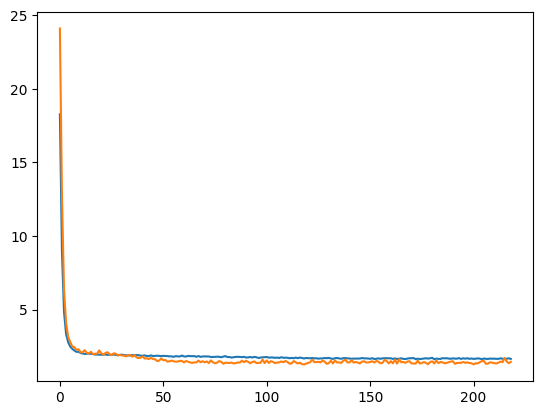

In [19]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [20]:
vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(0.3987)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(-2.3909)


In [21]:
print(vi.h_min_tilde)

-6.162025


In [22]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-0.7062290031792421
tensor([-0.5049])


In [23]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

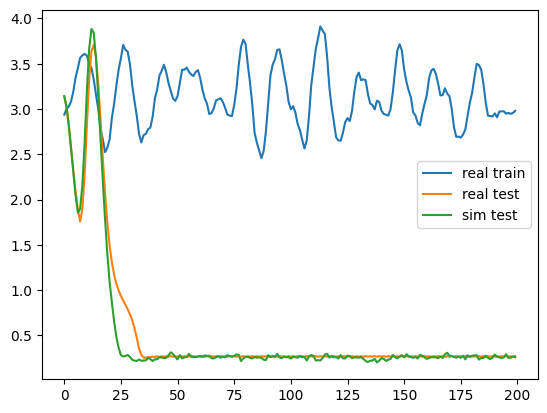

encoder [ 4.125474 -8.      ]
initial_belief tensor([ 3.9542, -3.5555])
real train tensor([ 4.1134, -8.0020])
real test tensor([ 4.2144, -8.0005])
sim tensor([ 4.1312, -7.9995])


In [24]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-1.0


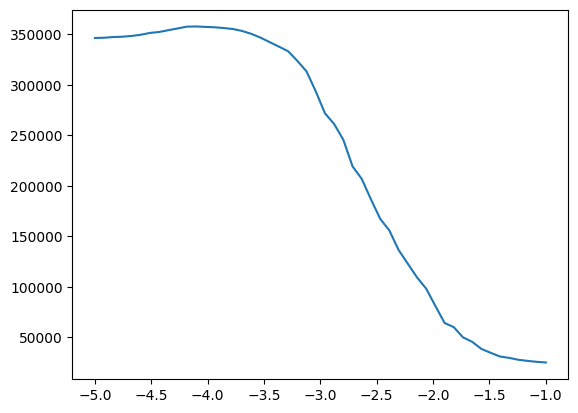

In [25]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [26]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-0.42198360572459054
tensor([1.8478])
